# Task
Analyze a publicly available diabetic dataset by loading it into a pandas DataFrame, exploring its structure and features, preprocessing the data (handling missing values, scaling, splitting), training a suitable machine learning classification model, evaluating the model's performance with appropriate metrics, visualizing the results (e.g., confusion matrix or ROC curve), and finally, summarizing the findings and suggesting next steps.

## Load Dataset

### Subtask:
Load a publicly available diabetic dataset, such as the Pima Indians Diabetes Dataset, into a pandas DataFrame.


**Reasoning**:
To load the dataset, I first need to import the pandas library, which is essential for data manipulation in Python.



In [1]:
import pandas as pd
print("pandas library imported.")

pandas library imported.


**Reasoning**:
Now that pandas is imported, the next step is to load the Pima Indians Diabetes Dataset into a pandas DataFrame as specified in the subtask.



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
print("Dataset loaded successfully.")


Dataset loaded successfully.


## Explore Data

### Subtask:
Perform initial data exploration to understand the dataset's structure, identify missing values, and analyze distributions of key features. This will include displaying basic statistics and data types.


**Reasoning**:
To begin data exploration, I will display the first 5 rows of the DataFrame, show a concise summary including data types and non-null counts, check for missing values, and generate descriptive statistics for numerical columns. These steps will provide a comprehensive initial understanding of the dataset's structure and content.



In [3]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame (info()):")
df.info()

print("\nMissing values count for each column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

First 5 rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Concise summary of the DataFrame (info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnanci

**Reasoning**:
The previous step provided basic statistics and identified potential issues where several columns have a minimum value of 0, which is biologically implausible. To further understand these distributions and confirm these potential issues, I will visualize the distributions of relevant features ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction') using histograms.



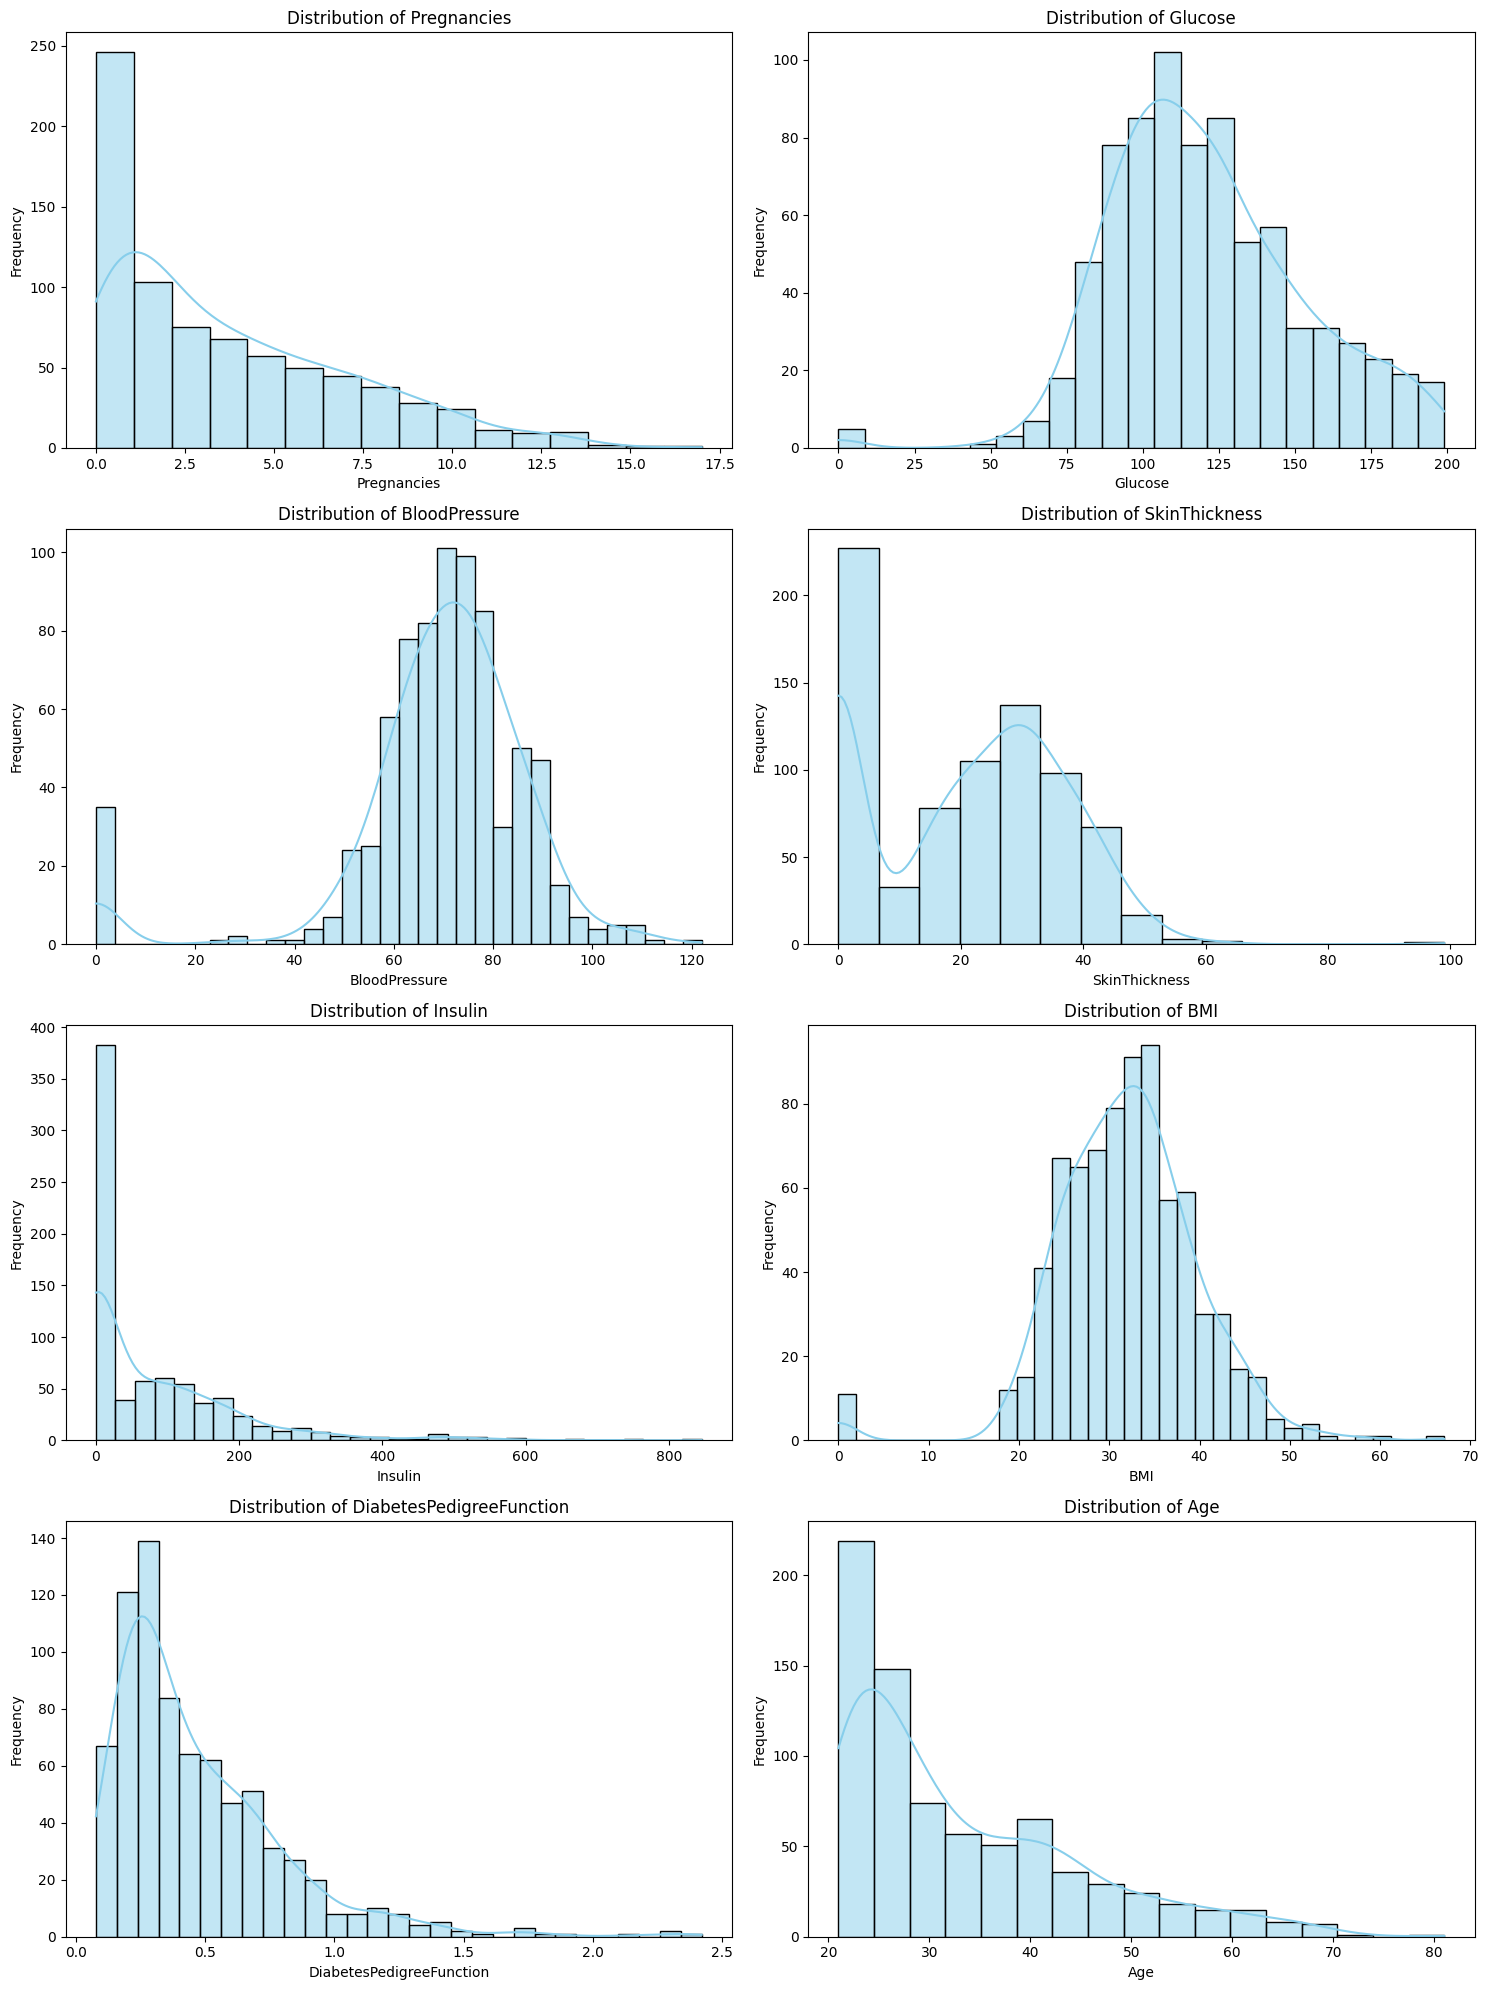

Histograms for key features displayed.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten() # Flatten the 2x4 array of axes for easy iteration

# Plot histogram for each feature
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histograms for key features displayed.")

## Preprocess Data

### Subtask:
Prepare the data for model training. This will involve handling any missing values, scaling numerical features, and splitting the dataset into training and testing sets.


**Reasoning**:
The previous steps involved exploring the data and identifying columns where '0' values represent missing data. Now, as per the instructions, I need to import the NumPy library, replace these '0' values with `np.nan`, and then impute these `np.nan` values with the median of their respective columns.



In [5]:
import numpy as np

# Columns where a value of 0 is biologically implausible and should be treated as a missing value
columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN in the identified columns
for col in columns_with_zero_as_missing:
    df[col] = df[col].replace(0, np.nan)

# Impute NaN values with the median of their respective columns
for col in columns_with_zero_as_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("Missing values (0s) in specified columns have been replaced with NaN and then imputed with the median.")
print("Updated descriptive statistics for numerical columns:")
print(df.describe())

Missing values (0s) in specified columns have been replaced with NaN and then imputed with the median.
Updated descriptive statistics for numerical columns:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208 

**Reasoning**:
Now that missing values have been addressed, the next step in data preprocessing is to scale the numerical features. This is crucial for many machine learning algorithms that are sensitive to the scale of input features. I will use `StandardScaler` from `sklearn.preprocessing` to normalize the data so that it has a mean of 0 and a standard deviation of 1, excluding the 'Outcome' column which is the target variable.



In [6]:
from sklearn.preprocessing import StandardScaler

# Define features to be scaled (all columns except 'Outcome')
features_to_scale = df.columns.drop('Outcome')

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaler to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Numerical features have been scaled using StandardScaler.")
print("First 5 rows of the scaled DataFrame:")
print(df.head())
print("\nDescriptive statistics of the scaled numerical columns:")
print(df[features_to_scale].describe())

Numerical features have been scaled using StandardScaler.
First 5 rows of the scaled DataFrame:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  

Descriptive statistics of the scaled numerical columns:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
cou

**Reasoning**:
With the numerical features scaled, the next crucial step in data preprocessing is to split the dataset into training and testing sets. This is essential for evaluating the model's performance on unseen data. I will separate the features (X) from the target variable (y) and then use `train_test_split` from `sklearn.model_selection` to perform this split.



In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
# Using a common split ratio (e.g., 80% train, 20% test) and a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets successfully.
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


## Train Model

### Subtask:
Choose and train a suitable machine learning classification model (e.g., Logistic Regression, Random Forest, or Support Vector Machine) on the preprocessed training data.


**Reasoning**:
To begin training a classification model, I will start by importing the LogisticRegression class, instantiate it with the specified parameters for reproducibility and optimal performance, and then train the model using the preprocessed training data.



In [8]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model

### Subtask:
Evaluate the trained model's performance on the test data using appropriate metrics such as accuracy, precision, recall, and F1-score.


**Reasoning**:
To evaluate the trained model, I will import the necessary metrics from `sklearn.metrics`, make predictions on the test set (`X_test`), and then print a detailed classification report along with the overall accuracy score.



In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154


Accuracy Score: 0.6948


## Visualize Results

### Subtask:
Generate a visualization to illustrate the model's performance, such as a confusion matrix or ROC curve, with appropriate legends.


**Reasoning**:
To visualize the model's performance, I will generate and plot a confusion matrix using `sklearn.metrics.confusion_matrix` and `sklearn.metrics.ConfusionMatrixDisplay` with appropriate labels and title, as specified in the instructions.



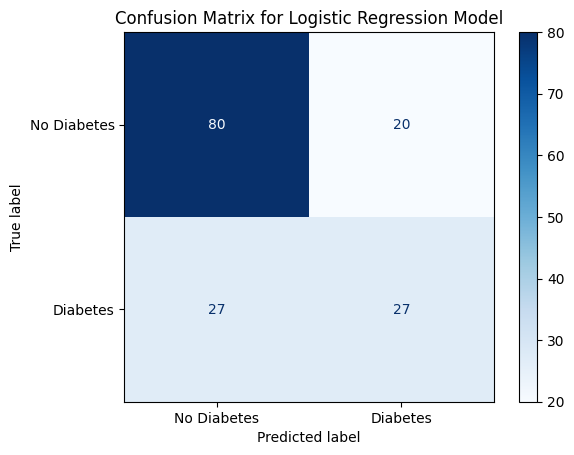

Confusion Matrix displayed successfully.


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define display labels
display_labels = ['No Diabetes', 'Diabetes']

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
print("Confusion Matrix displayed successfully.")

## Final Task

### Subtask:
Summarize the model's performance, discuss key findings, and suggest potential next steps for model improvement or further analysis.


## Summary:

### Q&A
*   **How did the model perform?**
    The Logistic Regression model achieved an overall accuracy of 69.48% on the test set. It performed better in classifying non-diabetic cases (Class 0) with a precision of 0.75 and recall of 0.80, compared to diabetic cases (Class 1) which had a precision of 0.57 and recall of 0.50.
*   **What are the key findings from the analysis?**
    The key findings are summarized in the "Data Analysis Key Findings" section below.
*   **What are potential next steps for model improvement or further analysis?**
    Potential next steps include exploring different classification algorithms, addressing class imbalance, and conducting feature engineering, as detailed in the "Insights or Next Steps" section.

### Data Analysis Key Findings
*   The Pima Indians Diabetes Dataset, containing 768 entries and 9 columns, was successfully loaded and explored.
*   Initial data exploration revealed no explicit missing values (NaNs), but identified biologically implausible '0' values in key columns ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'), indicating implicitly missing data.
*   During preprocessing, these '0' values were replaced with `NaN` and subsequently imputed using the median of their respective columns. For example, the minimum 'Glucose' value changed from 0 to 44 after imputation.
*   Numerical features (all except 'Outcome') were scaled using `StandardScaler`, resulting in features with means close to 0 and standard deviations close to 1.
*   The dataset was split into training (80%) and testing (20%) sets, with 614 samples for training and 154 for testing, ensuring stratification by the 'Outcome' variable.
*   A Logistic Regression model was trained on the preprocessed training data.
*   The model achieved an accuracy of 69.48% on the test set.
*   Performance metrics showed:
    *   For the 'No Diabetes' class (0): Precision of 0.75, Recall of 0.80, and F1-score of 0.77.
    *   For the 'Diabetes' class (1): Precision of 0.57, Recall of 0.50, and F1-score of 0.53.
*   A confusion matrix was generated, visually confirming the classification performance and indicating a higher number of false negatives for the 'Diabetes' class.

### Insights or Next Steps
*   **Address Class Imbalance & Improve Minority Class Prediction**: The model showed a notable drop in performance (precision and recall) for the 'Diabetes' class (Class 1), indicating a potential class imbalance or difficulty in distinguishing this class. Investigate techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights to improve the model's ability to identify diabetic patients.
*   **Explore Advanced Models and Feature Engineering**: Given the moderate performance of Logistic Regression, consider evaluating more complex models such as Support Vector Machines (SVM), Gradient Boosting, or Random Forests. Additionally, conduct further feature engineering to derive new, more informative features from the existing ones (e.g., interaction terms or polynomial features) which might enhance predictive power.


In [11]:
pip install shap

In [12]:
import shap
print("SHAP library imported.")

SHAP library imported.


### Initialize SHAP Explainer

For a linear model like Logistic Regression, `shap.LinearExplainer` is an efficient choice. It calculates SHAP values exactly for linear models.

In [13]:
# Initialize JS visualization in notebook
shap.initjs()

# For linear models like Logistic Regression, use LinearExplainer
explainer = shap.LinearExplainer(model, X_train)

print("SHAP explainer initialized.")

SHAP explainer initialized.


### Calculate SHAP values

Now, let's calculate the SHAP values for a sample of the test set. Using the entire test set can be computationally intensive, so we'll use a subset for demonstration.

In [14]:
# Take a sample of the test data for SHAP value calculation for faster execution
X_test_sample = X_test.sample(n=100, random_state=42)

# Calculate SHAP values for the test sample
shap_values = explainer.shap_values(X_test_sample)

print("SHAP values calculated for the test sample.")

SHAP values calculated for the test sample.


### Visualize SHAP values

Let's visualize the SHAP values to understand feature importance and impact on the model's output. The summary plot shows the distribution of SHAP values for each feature, indicating how much each feature contributes to pushing the model's output from the base value to the predicted value.

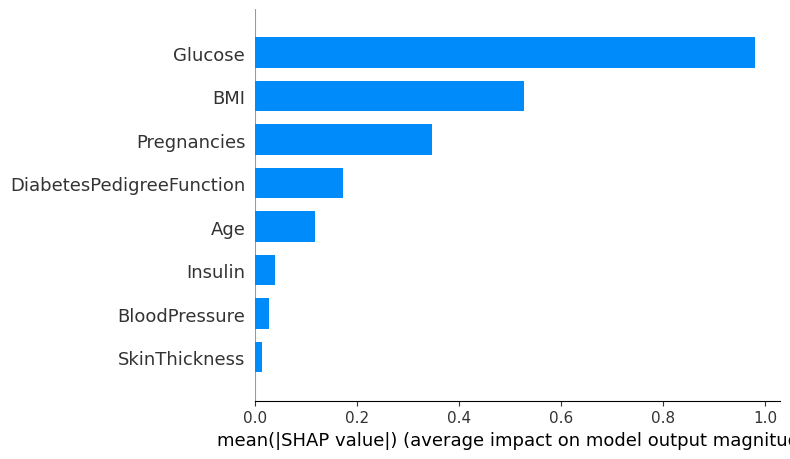

SHAP summary plot (bar) displayed.


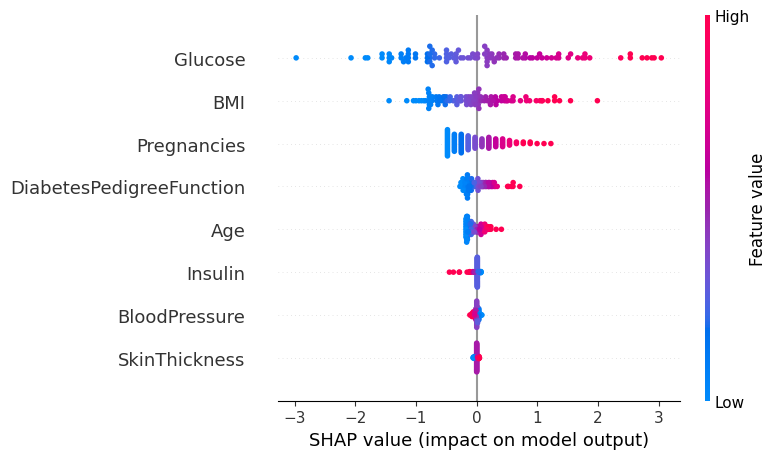

SHAP summary plot (beeswarm) displayed.


In [15]:
# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", feature_names=X_test_sample.columns)

print("SHAP summary plot (bar) displayed.")

shap.summary_plot(shap_values, X_test_sample, feature_names=X_test_sample.columns)

print("SHAP summary plot (beeswarm) displayed.")